In [488]:
import sys
sys.path.append('../') 

In [489]:

%load_ext autoreload
%autoreload 2
import sklearn
import copy
import numpy as np

import seaborn as sns
sns.set()

import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
# from viz import viz
from bokeh.plotting import figure, show, output_notebook, output_file, save
from functions import merge_data
from sklearn.model_selection import RandomizedSearchCV
import load_data


from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from fit_and_predict import fit_and_predict


The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


## Params:

In [490]:
aggregate_by_state = False
outcome_type = 'deaths'

## Basic Data Visualization

In [491]:
# Just something to quickly summarize the number of cases and distributions each day

In [492]:
# 'deaths' and 'cases' contain the time-series of the outbreak
df = load_data.load_county_level(data_dir = '../data/')
df = df.sort_values('#Deaths_3/29/2020', ascending=False)
# outcome_cases = load_data.outcome_cases # most recent day
# outcome_deaths = load_data.outcome_deaths
important_vars = load_data.important_keys(df)
very_important_vars = ['PopulationDensityperSqMile2010',
#                        'MedicareEnrollment,AgedTot2017',
                       'PopulationEstimate2018',
                       '#ICU_beds',
                       'MedianAge2010',
                       'Smokers_Percentage',
                       'DiabetesPercentage',
                       'HeartDiseaseMortality',
                        '#Hospitals'
#                        'PopMale60-642010',
#                         'PopFmle60-642010',
#                          'PopMale65-742010',
#                          'PopFmle65-742010',
#                          'PopMale75-842010',
#                          'PopFmle75-842010',
#                          'PopMale>842010',
#                          'PopFmle>842010'
                      ]

In [493]:
def sum_lists(list_of_lists):
    arr = np.array(list(list_of_lists))
    sum_arr = np.sum(arr,0)
    return list(sum_arr)
if aggregate_by_state:
    # Aggregate by State
    state_deaths_df = df.groupby('StateNameAbbreviation').deaths.agg(sum_lists).to_frame()
    state_cases_df = df.groupby('StateNameAbbreviation').cases.agg(sum_lists).to_frame()
    df =  pd.concat([state_cases_df,state_deaths_df],axis =1 )

Number of counties with non-zero cases
1953


(array([85., 59., 31., 28., 20., 13., 17., 13., 14.,  9.,  8.,  5., 10.,
        10.,  7.,  3.,  4.,  2.,  3.,  2.,  4.,  3.,  2.,  4.,  0.,  3.,
         6.,  1.,  1.,  2.,  1.,  3.,  3.,  2.,  0.,  1.,  0.,  1.,  0.,
         1.,  1.,  0.,  2.,  1.,  1.,  0.,  0.,  0.,  2.,  0.,  0.,  1.,
         1.,  0.,  2.,  0.,  2.,  1.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,
         1.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  1.,
         0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  1.,  0.,  0.,
         1.,  0.,  0.,  0.,  2.,  0.,  0.,  0.,  2.]),
 array([ 21. ,  30.6,  40.2,  49.8,  59.4,  69. ,  78.6,  88.2,  97.8,
        107.4, 117. , 126.6, 136.2, 145.8, 155.4, 165. , 174.6, 184.2,
        193.8, 203.4, 213. , 222.6, 232.2, 241.8, 251.4, 261. , 270.6,
        280.2, 289.8, 299.4, 309. , 318.6, 328.2, 337.8, 347.4, 357. ,
        366.6, 376.2, 385.8, 395.4, 405. , 414.6, 424.2, 433.8, 443.4,
        453. , 462.6, 472.2, 481.8, 491.4, 501. , 510.6, 520.2, 529.8,
        

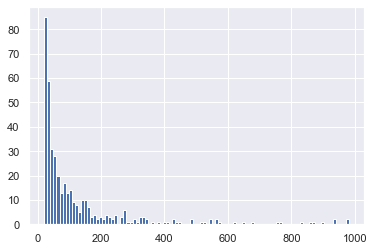

In [494]:
# Distribution of the maximum number of cases
_cases = list(df['cases'])

max_cases = []
for i in range(len(df)):
    max_cases.append(max(_cases[i]))

print('Number of counties with non-zero cases')
print(sum([v >0 for v in max_cases]))


# cases truncated below 20 and above 1000 for plot readability
plt.hist([v for v in max_cases if v > 20 and v < 1000],bins = 100)


In [495]:
sum(max_cases)

136512

In [496]:
print(sum([v > 50 for v in max_cases]))


249


In [497]:
np.quantile(max_cases,.5)

1.0

Number of counties with non-zero deaths
399


(array([39.,  5.,  2.,  3.,  3.,  0.,  0.,  0.,  1.,  0.,  0.,  1.,  0.,
         0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  1.,  1.,  0.,  0.,  0.,
         0.,  0.,  0.,  1.]),
 array([  6.        ,  14.23333333,  22.46666667,  30.7       ,
         38.93333333,  47.16666667,  55.4       ,  63.63333333,
         71.86666667,  80.1       ,  88.33333333,  96.56666667,
        104.8       , 113.03333333, 121.26666667, 129.5       ,
        137.73333333, 145.96666667, 154.2       , 162.43333333,
        170.66666667, 178.9       , 187.13333333, 195.36666667,
        203.6       , 211.83333333, 220.06666667, 228.3       ,
        236.53333333, 244.76666667, 253.        ]),
 <a list of 30 Patch objects>)

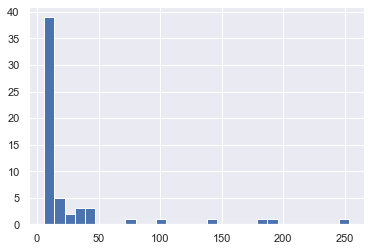

In [498]:
# Distribution of the maximum number of cases
_deaths = list(df['deaths'])

max_deaths = []
for i in range(len(df)):
    max_deaths.append(max(_deaths[i]))

    
print('Number of counties with non-zero deaths')
print(sum([v > 0 for v in max_deaths]))
# plt.hist(max_cases)

# print(sum([v >0 for v in max_cases]))
plt.hist([v for v in max_deaths if v > 5],bins=30)

In [499]:
sum(max_deaths)

2265

In [500]:
max(max_deaths)

253

In [501]:
np.quantile(max_deaths,.7)

0.0

### Clean data

In [502]:
# Remove counties with zero cases
max_cases = [max(v) for v in df['cases']]
df['max_cases'] = max_cases
max_deaths = [max(v) for v in df['deaths']]
df['max_deaths'] = max_deaths
df =  df[df['max_cases'] > 0]



## Predict data from model:

In [503]:
method_keys = []

In [197]:
# clear predictions
for m in method_keys:
    del df[m]
    

In [676]:
target_day = [1]
# Trains model on train_df and produces predictions for the final day for test_df and writes prediction
# to a new column for test_df 
# fit_and_predict(df, method='exponential', outcome=outcome_type, mode='eval_mode',target_day=target_day)
# fit_and_predict(df,method='shared_exponential', outcome=outcome_type, mode='eval_mode',target_day=target_day)
# fit_and_predict(train_df, test_df,'shared_exponential', mode='eval_mode',demographic_vars=important_vars)
# fit_and_predict(df,method='shared_exponential', outcome=outcome_type, mode='eval_mode',demographic_vars=very_important_vars,target_day=target_day)
fit_and_predict(df, outcome=outcome_type, mode='eval_mode',demographic_vars=[],
                                     method='ensemble',target_day=target_day)
# fit_and_predict(train_df, test_d f,method='exponential',mode='eval_mode',target_day = np.array([1,2]))

# Finds the names of all the methods
method_keys = [c for c in df if 'predicted' in c]
method_keys

Feature weights
log(deaths) : 0.9981505008513808
bias : 0.1980681709067381
Feature weights
log(deaths) : 0.9655859329391752
bias : 0.2900539698192055
Feature weights
log(deaths) : 0.9502200172608191
bias : 0.33789981961937143
Feature weights
log(deaths) : 0.9225917119833635
bias : 0.4231836446269613
Feature weights
log(deaths) : 0.9001884886739072
bias : 0.4755789604481983
Feature weights
log(deaths) : 0.8656056211882738
bias : 0.5606674381514154
Feature weights
log(deaths) : 0.8303237774760368
bias : 0.6429281905665872
Feature weights
log(deaths) : 0.9773501198507928
bias : 0.15751814267906636


['predicted_deaths_ensemble_1']

In [195]:
for days_ahead in [1, 2, 3]:
    for method in ['exponential', 'shared_exponential', 'ensemble']:  
        fit_and_predict(df, method=method, outcome=outcome_type, mode='eval_mode',target_day=np.array([days_ahead]))
        
        if method == 'shared_exponential':
            fit_and_predict(df,method='shared_exponential', 
                             outcome=outcome_type, 
                             mode='eval_mode',
                             demographic_vars=very_important_vars,
                             target_day=np.array([days_ahead]))
method_keys = [c for c in df if 'predicted' in c]
geo = ['countyFIPS', 'CountyNamew/StateAbbrev']
# df_preds = df[method_keys + geo]
# df_preds.to_pickle("multi_day_1.pkl")

Feature weights
log(deaths) : 0.9981505008513798
bias : 0.19806817090673984
Feature weights
PopulationDensityperSqMile2010 : 7.564484539346035e-06
PopulationEstimate2018 : 4.8702464247040915e-08
#ICU_beds : -0.00041278207075121
MedianAge2010 : 0.018874776030234106
Smokers_Percentage : -0.0072936229928942786
DiabetesPercentage : 0.023020559847687583
HeartDiseaseMortality : 0.0014493648980887074
#Hospitals : 0.007608431024797871
log(deaths) : 0.9342734581903599
bias : -0.7356993261304198
Feature weights
log(deaths) : 0.9981505008513798
bias : 0.19806817090673984
Feature weights
log(deaths) : 0.9655859329391748
bias : 0.29005396981920606
Feature weights
log(deaths) : 0.9502200172608184
bias : 0.3378998196193733
Feature weights
log(deaths) : 0.9225917119833639
bias : 0.42318364462696056
Feature weights
log(deaths) : 0.900188488673908
bias : 0.47557896044819803
Feature weights
log(deaths) : 0.8656056211882739
bias : 0.5606674381514144
Feature weights
log(deaths) : 0.830323777476037
bias : 0

In [199]:
method_keys = [c for c in df if 'predicted' in c]
#df_preds = df[method_keys + geo + ['deaths']]
#df_preds.to_pickle("multi_day_2.pkl")

## Evaluate and visualize models

### Compute MSE and log MSE on relevant cases

In [679]:
# TODO: add average rank as metric

In [680]:
# Computes the mse in log space and non-log space for all columns

In [681]:
def l1(arr1,arr2):
    return sum([np.abs(a1-a2) for (a1,a2) in zip(arr1,arr2)])/len(arr1)
mse = sklearn.metrics.mean_squared_error
# Only evaluate points that exceed this number of deaths 
lower_threshold, upper_threshold = 10, 1000
lower_threshold, upper_threshold = 10, np.inf

In [682]:
# Log scaled
outcome = np.array([df[outcome_type].values[i][-1] for i in range(len(df))])
for key in method_keys:
    preds = [np.log(p[-1] + 1) for p in df[key][(outcome > lower_threshold)]] # * (outcome < upper_threshold)]]
    print('Log scale MSE for '+key)
    print(mse(np.log(outcome[(outcome > lower_threshold) * (outcome < upper_threshold)] + 1),preds))

Log scale MSE for predicted_deaths_ensemble_1
0.33353330829300565


In [683]:
# Log scaled
outcome = np.array([df[outcome_type].values[i][-1] for i in range(len(df))])
for key in method_keys:
    preds = [np.log(p[-1] + 1) for p in df[key][outcome > lower_threshold]]
    print('Log scale l1 for '+key)
    print(l1(np.log(outcome[outcome > lower_threshold] + 1),preds))

Log scale l1 for predicted_deaths_ensemble_1
0.2971089389939363


In [684]:
# No log scale
outcome = np.array([df[outcome_type].values[i][-1] for i in range(len(df))])
for key in method_keys:
    preds = [p[-1] for p in df[key][outcome > lower_threshold]]
    print('Raw MSE for '+key)
    print(mse(outcome[outcome > lower_threshold],preds))

Raw MSE for predicted_deaths_ensemble_1
193.8644424896314


In [200]:
# No log scale
outcome = np.array([df[outcome_type].values[i][-1] for i in range(len(df))])
for key in method_keys:
    preds = [p[-1] for p in df[key][outcome > lower_threshold]]
    print('Raw l1 for '+key)
    print(l1(outcome[outcome > lower_threshold],preds))

Raw l1 for predicted_deaths_exponential_1
10.212454065131153
Raw l1 for predicted_deaths_shared_exponential_1
7.249422928303043
Raw l1 for predicted_deaths_shared_exponential_1_demographics
8.69567417456938
Raw l1 for predicted_deaths_ensemble_1
8.548761662535114
Raw l1 for predicted_deaths_exponential_2
13.57986367208856
Raw l1 for predicted_deaths_shared_exponential_2_demographics
7.973081256574322
Raw l1 for predicted_deaths_exponential_3
21.039525636886403
Raw l1 for predicted_deaths_shared_exponential_3_demographics
10.618675731271862
Raw l1 for predicted_deaths_shared_exponential_2
12.55945391382441
Raw l1 for predicted_deaths_ensemble_2
12.367529975417884
Raw l1 for predicted_deaths_shared_exponential_3
13.206711089421523
Raw l1 for predicted_deaths_ensemble_3
9.499547975017318


### Plot residuals

In [686]:
# TODO: Create bounds automatically, create a plot function and call it instead of copying code, figure out way
# to plot more than two things at once cleanly

# Creates residual plots log scaled and raw
# We only look at cases with number of deaths greater than 5

In [687]:
def method_name_to_pretty_name(key):
    # TODO: hacky, fix
    words = key.split('_')
    words2 = []
    for w in words:
        if not w.isnumeric():
            words2.append(w)
            
    model_name = words2[2:]
    return ' '.join(model_name)

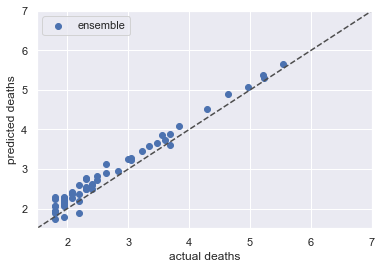

In [695]:
# Make log plots:
bounds = [1.5, 7]
outcome = np.array([df[outcome_type].values[i][-1] for i in range(len(df))])
for key in method_keys:
    preds = [np.log(p[-1]) for p in df[key][outcome > 5]]
    plt.scatter(np.log(outcome[outcome > 5]),preds,label=method_name_to_pretty_name(key))
    plt.xlabel('actual deaths')
    plt.ylabel('predicted deaths')
    plt.xlim(bounds)
    plt.ylim(bounds)
    plt.legend()

    plt.plot(bounds, bounds, ls="--", c=".3")
    plt.show()

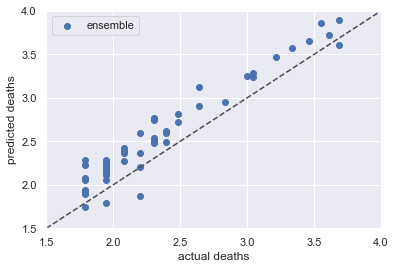

In [696]:
# Make log plots zoomed in for the counties that have a fewer number of deaths
bounds = [1.5, 4]
outcome = np.array([df['deaths'].values[i][-1] for i in range(len(df))])
for key in method_keys:
    preds = [np.log(p[-1]) for p in df[key][outcome > 5]]
    plt.scatter(np.log(outcome[outcome > 5]),preds,label=method_name_to_pretty_name(key))

    plt.xlabel('actual deaths')
    plt.ylabel('predicted deaths')
    plt.xlim(bounds)
    plt.ylim(bounds)
    plt.legend()

    plt.plot(bounds, bounds, ls="--", c=".3")
    plt.show()

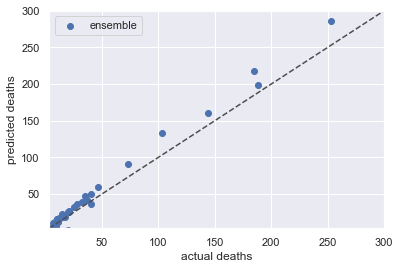

In [697]:
# Make non-log plots zoomed in for the counties that have a fewer number of deaths# We set bounds 
bounds = [3, 300]
outcome = np.array([df['deaths'].values[i][-1] for i in range(len(df))])
for key in method_keys:
    preds = [p[-1] for p in df[key][outcome > 5]]
    plt.scatter(outcome[outcome > 5],preds,label=method_name_to_pretty_name(key))

    plt.xlabel('actual deaths')
    plt.ylabel('predicted deaths')
    plt.xlim(bounds)
    plt.ylim(bounds)
    plt.legend()

    plt.plot(bounds, bounds, ls="--", c=".3")
    plt.show()

### Graph Visualizations

In [634]:
# Here we visualize predictions on a per county level.
# The blue lines are the true number of deaths, and the dots are our predictions for each model for those days.

In [705]:
def plot_prediction(row):
    """
    Plots model predictions vs actual
    row: dataframe row
    window: autoregressive window size
    """
    gold_key = 'deaths'
    for i,val in enumerate(row[gold_key]):
        if val > 0:
            start_point = i
            break
#     plt.plot(row[gold_key][start_point:], label=gold_key) 
    if len(row[gold_key][start_point:]) < 3:
        return
    sns.lineplot(list(range(len(row[gold_key][start_point:]))),row[gold_key][start_point:], label=gold_key)
    
    

    for key in method_keys:
        preds = row[key]

        sns.scatterplot(list(range(len(row[gold_key][start_point:])))[-len(preds):],preds,label=method_name_to_pretty_name(key))
        
#         plt.scatter(list(range(len(row[gold_key][start_point:])))[-len(preds):],preds,label=key)
    
#     plt.legend()
#     plt.show()
#     sns.legend()
    plt.ylabel('Deaths')
    plt.xlabel('Days since first death')
    plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)
    
    plt.show()

    

In [706]:
# feature_vals = {
# 'PopulationDensityperSqMile2010' : 1.1525491065255939e-05,
# "MedicareEnrollment,AgedTot2017" : -2.119520577282583e-06,
# 'PopulationEstimate2018' : 2.8898343032154275e-07,
# '#ICU_beds' : -0.000647030727828718,
# 'MedianAge2010' : 0.05032666600339253,
# 'Smokers_Percentage' : -0.013410742818946319,
# 'DiabetesPercentage' : 0.04395318355581005,
# 'HeartDiseaseMortality' : 0.0015473771787186525,
# '#Hospitals': 0.019248102357644396,
# 'log(deaths)' : 0.8805209010821442,
# 'bias' : -1.871552103871495
# }

Queens in NY


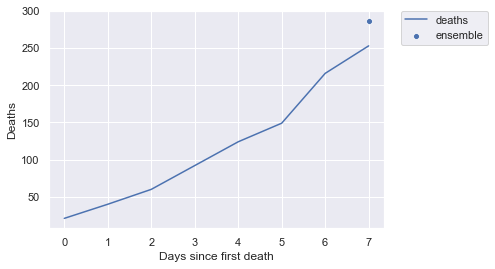

PopulationDensityperSqMile2010: 20553.6
PopulationEstimate2018: 2278906.0
#ICU_beds: 129
MedianAge2010: 37.2
Smokers_Percentage: 12.42777748
DiabetesPercentage: 10.2
HeartDiseaseMortality: 180.0
#Hospitals: 6


Bronx in NY


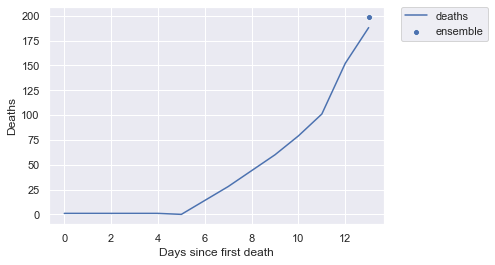

PopulationDensityperSqMile2010: 32903.3
PopulationEstimate2018: 1432132.0
#ICU_beds: 270
MedianAge2010: 32.8
Smokers_Percentage: 15.921168722
DiabetesPercentage: 12.3
HeartDiseaseMortality: 201.3
#Hospitals: 6


Kings in NY


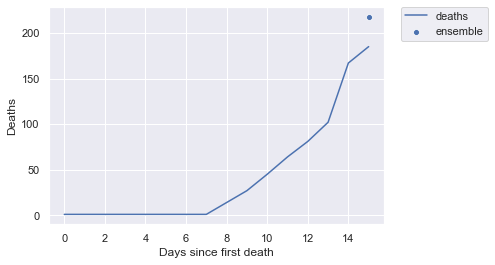

PopulationDensityperSqMile2010: 35369.2
PopulationEstimate2018: 2582830.0
#ICU_beds: 318
MedianAge2010: 34.1
Smokers_Percentage: 13.840801998
DiabetesPercentage: 9.7
HeartDiseaseMortality: 195.8
#Hospitals: 12


King in WA


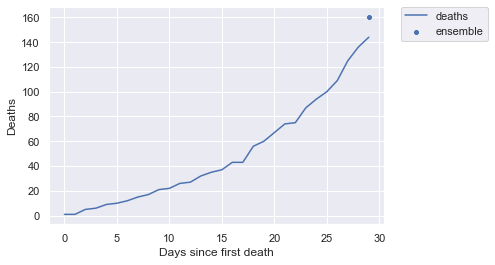

PopulationDensityperSqMile2010: 912.9
PopulationEstimate2018: 2233163.0
#ICU_beds: 450
MedianAge2010: 37.1
Smokers_Percentage: 8.8150454593
DiabetesPercentage: 7.1
HeartDiseaseMortality: 118.9
#Hospitals: 17


New York in NY


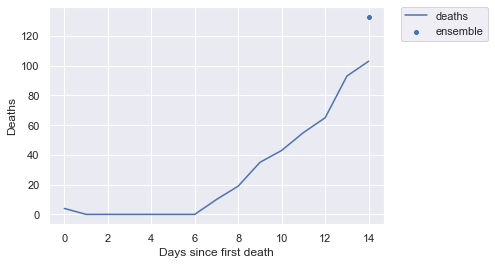

PopulationDensityperSqMile2010: 69468.4
PopulationEstimate2018: 1628701.0
#ICU_beds: 761
MedianAge2010: 36.4
Smokers_Percentage: 12.41823421
DiabetesPercentage: 6.5
HeartDiseaseMortality: 143.5
#Hospitals: 12


Orleans in LA


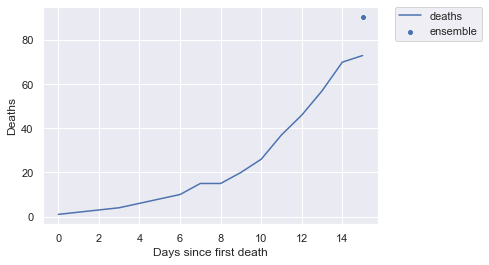

PopulationDensityperSqMile2010: 2029.4
PopulationEstimate2018: 391006.0
#ICU_beds: 111
MedianAge2010: 34.6
Smokers_Percentage: 22.609624129
DiabetesPercentage: 10.3
HeartDiseaseMortality: 189.7
#Hospitals: 5


Richmond in NY


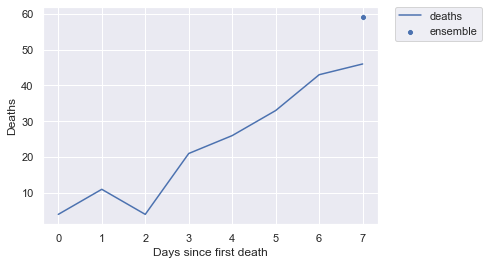

PopulationDensityperSqMile2010: 8030.3
PopulationEstimate2018: 476179.0
#ICU_beds: 114
MedianAge2010: 38.4
Smokers_Percentage: 15.373417772
DiabetesPercentage: 9.6
HeartDiseaseMortality: 239.6
#Hospitals: 2


Suffolk in NY


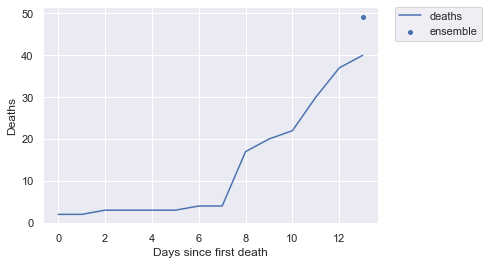

PopulationDensityperSqMile2010: 1637.4
PopulationEstimate2018: 1481093.0
#ICU_beds: 281
MedianAge2010: 39.8
Smokers_Percentage: 12.625481467
DiabetesPercentage: 6.8
HeartDiseaseMortality: 181.8
#Hospitals: 10


Cook in IL


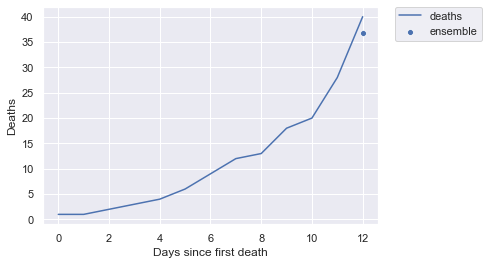

PopulationDensityperSqMile2010: 5495.1
PopulationEstimate2018: 5180493.0
#ICU_beds: 1606
MedianAge2010: 35.3
Smokers_Percentage: 13.776183162
DiabetesPercentage: 9
HeartDiseaseMortality: 175.1
#Hospitals: 46


Los Angeles in CA


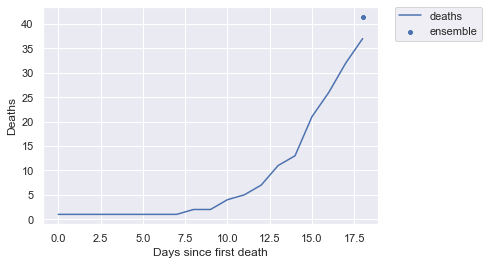

PopulationDensityperSqMile2010: 2419.6
PopulationEstimate2018: 10105518.0
#ICU_beds: 2126
MedianAge2010: 34.8
Smokers_Percentage: 10.847678109
DiabetesPercentage: 8.1
HeartDiseaseMortality: 150.8
#Hospitals: 76


Nassau in NY


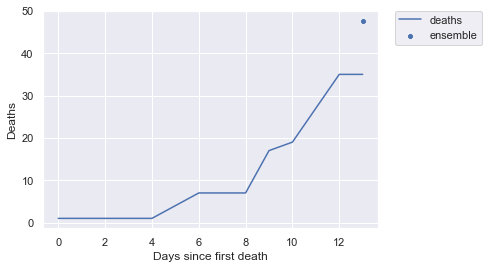

PopulationDensityperSqMile2010: 4704.8
PopulationEstimate2018: 1358343.0
#ICU_beds: 461
MedianAge2010: 41.1
Smokers_Percentage: 11.225364644
DiabetesPercentage: 7.2
HeartDiseaseMortality: 188.2
#Hospitals: 10


Bergen in NJ


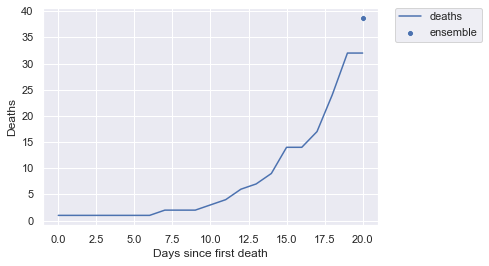

PopulationDensityperSqMile2010: 3884.5
PopulationEstimate2018: 936692.0
#ICU_beds: 147
MedianAge2010: 41.1
Smokers_Percentage: 11.410986988
DiabetesPercentage: 6.8
HeartDiseaseMortality: 140.1
#Hospitals: 6


Jefferson in LA


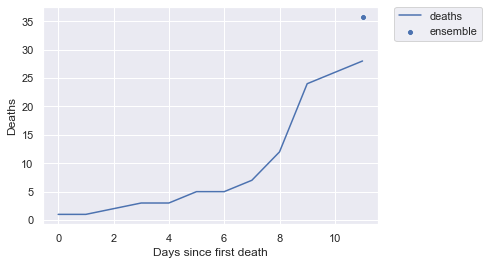

PopulationDensityperSqMile2010: 1463.1
PopulationEstimate2018: 434051.0
#ICU_beds: 215
MedianAge2010: 38.4
Smokers_Percentage: 18.743669593
DiabetesPercentage: 12.7
HeartDiseaseMortality: 178.7
#Hospitals: 5


Santa Clara in CA


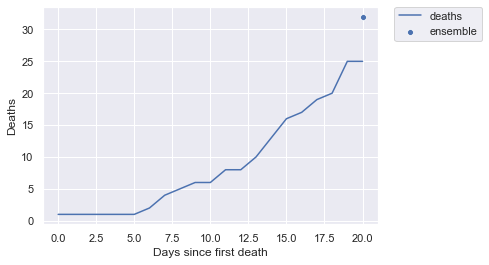

PopulationDensityperSqMile2010: 1381.0
PopulationEstimate2018: 1937570.0
#ICU_beds: 313
MedianAge2010: 36.2
Smokers_Percentage: 8.2690140125
DiabetesPercentage: 7.3
HeartDiseaseMortality: 104.2
#Hospitals: 9


Snohomish in WA


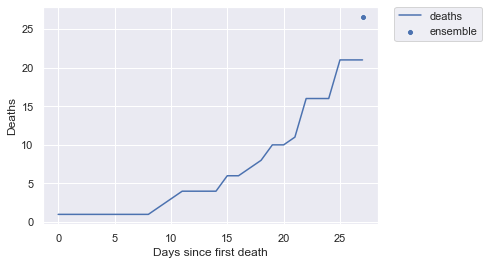

PopulationDensityperSqMile2010: 341.8
PopulationEstimate2018: 814901.0
#ICU_beds: 72
MedianAge2010: 37.1
Smokers_Percentage: 12.962308599
DiabetesPercentage: 7.7
HeartDiseaseMortality: 131.9
#Hospitals: 4


Fairfield in CT


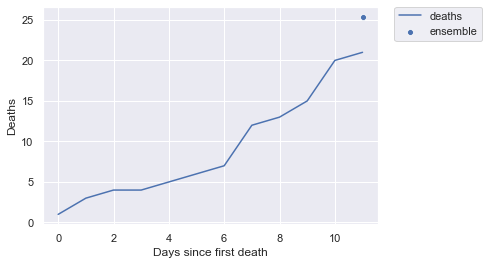

PopulationDensityperSqMile2010: 1467.2
PopulationEstimate2018: 943823.0
#ICU_beds: 173
MedianAge2010: 39.5
Smokers_Percentage: 10.157896011
DiabetesPercentage: 6.4
HeartDiseaseMortality: 137.1
#Hospitals: 6


Essex in NJ


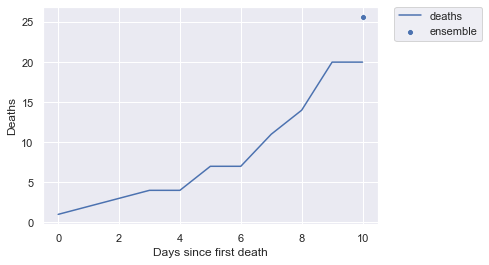

PopulationDensityperSqMile2010: 6211.5
PopulationEstimate2018: 799767.0
#ICU_beds: 267
MedianAge2010: 36.4
Smokers_Percentage: 14.235389268
DiabetesPercentage: 9.9
HeartDiseaseMortality: 169.8
#Hospitals: 7


Shiawassee in MI
PopulationDensityperSqMile2010: 133.1
PopulationEstimate2018: 68192.0
#ICU_beds: 7
MedianAge2010: 40.3
Smokers_Percentage: 17.880387598
DiabetesPercentage: 10.2
HeartDiseaseMortality: 209.2
#Hospitals: 1


Dougherty in GA


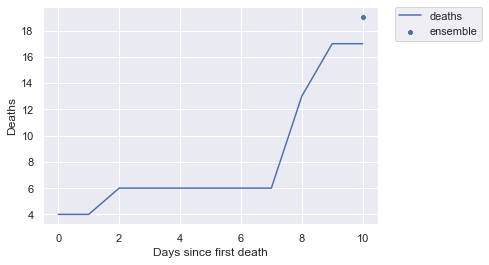

PopulationDensityperSqMile2010: 287.7
PopulationEstimate2018: 91243.0
#ICU_beds: 50
MedianAge2010: 33.2
Smokers_Percentage: 21.607553194
DiabetesPercentage: 13.8
HeartDiseaseMortality: 178.8
#Hospitals: 1


Clark in NV


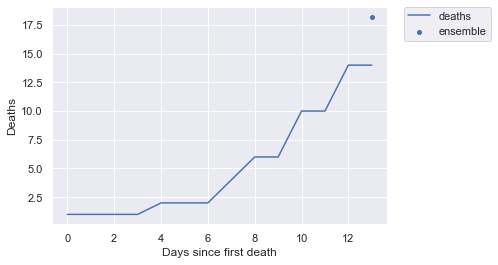

PopulationDensityperSqMile2010: 247.3
PopulationEstimate2018: 2231647.0
#ICU_beds: 535
MedianAge2010: 35.5
Smokers_Percentage: 16.979704666
DiabetesPercentage: 10
HeartDiseaseMortality: 204.3
#Hospitals: 19


Middlesex in NJ


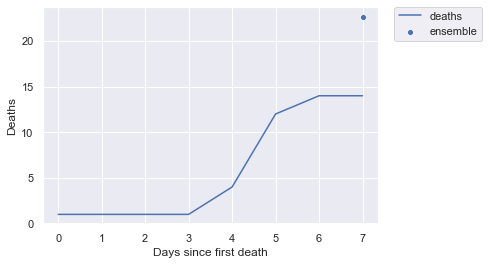

PopulationDensityperSqMile2010: 2621.6
PopulationEstimate2018: 829685.0
#ICU_beds: 185
MedianAge2010: 37.2
Smokers_Percentage: 10.970467888
DiabetesPercentage: 9.7
HeartDiseaseMortality: 154.3
#Hospitals: 5


Fulton in GA


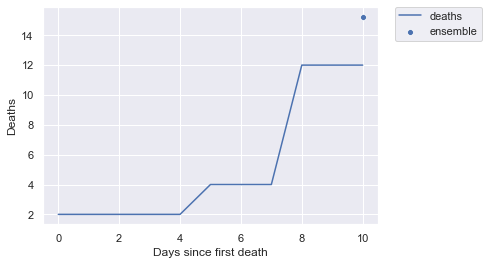

PopulationDensityperSqMile2010: 1748.1
PopulationEstimate2018: 1050114.0
#ICU_beds: 538
MedianAge2010: 34.2
Smokers_Percentage: 14.925509463
DiabetesPercentage: 8.3
HeartDiseaseMortality: 157.6
#Hospitals: 7


Morris in NJ


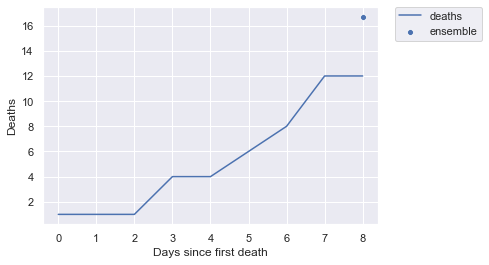

PopulationDensityperSqMile2010: 1069.8
PopulationEstimate2018: 494228.0
#ICU_beds: 91
MedianAge2010: 41.3
Smokers_Percentage: 12.111935176
DiabetesPercentage: 6.3
HeartDiseaseMortality: 143.5
#Hospitals: 3


El Paso in CO


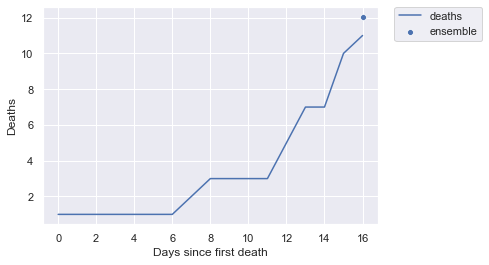

PopulationDensityperSqMile2010: 292.6
PopulationEstimate2018: 713856.0
#ICU_beds: 95
MedianAge2010: 34.1
Smokers_Percentage: 14.264909913
DiabetesPercentage: 6.5
HeartDiseaseMortality: 135.6
#Hospitals: 3


Broward in FL


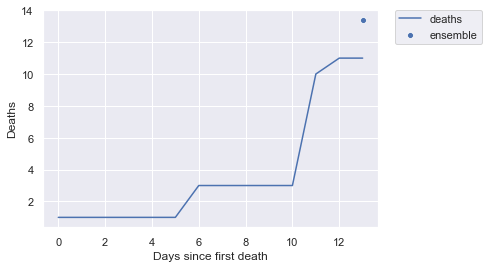

PopulationDensityperSqMile2010: 1444.9
PopulationEstimate2018: 1951260.0
#ICU_beds: 587
MedianAge2010: 39.7
Smokers_Percentage: 14.593792551
DiabetesPercentage: 8.1
HeartDiseaseMortality: 146.9
#Hospitals: 14


Monmouth in NJ


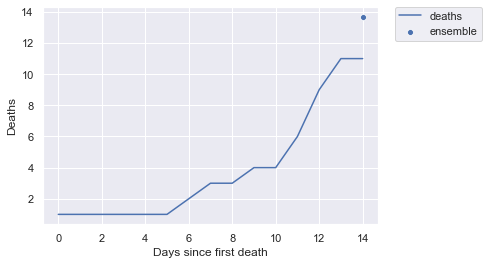

PopulationDensityperSqMile2010: 1344.7
PopulationEstimate2018: 621354.0
#ICU_beds: 152
MedianAge2010: 41.3
Smokers_Percentage: 13.360452416
DiabetesPercentage: 7.5
HeartDiseaseMortality: 159.1
#Hospitals: 5




In [707]:
df = df.sort_values(by='max_deaths',ascending=False)
for i in range(len(df)):
    row = df.iloc[i]
    # If number of deaths greater than 10
    if max(row['deaths']) > 10:
        print(row['CountyName']+' in '+row['StateNameAbbreviation'])
        plot_prediction(row)
        for v in very_important_vars:
            print(v+ ': '+str(row[v])) #+';\t contrib: '+ str(feature_vals[v]*float(row[v])))
        print('\n')